# Creating a simple ODE model

In this series of notebooks, we will run through the steps involved in creating a new model within pybamm. Before using pybamm we recommend following the [Getting Started](../Getting%20Started) guides.

In this notebook we create and solve the following simple ODE model:

\begin{align*}
  \frac{\textrm{d} x}{\textrm{d} t} &= 4x - 2y, \quad x(0) = 1, \\
  \frac{\textrm{d} y}{\textrm{d} t} &= 3x - y, \quad y(0) = 2.
\end{align*}

We begin by importing the pybamm library into this notebook, along with numpy and matplotlib, which we use for plotting:


In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

## Setting up the model

We first initialise the model using the `BaseModel` class. This sets up the required structure for our model. 

In [2]:
model = pybamm.BaseModel()

Next, we define the variables in the model using the `Variable` class. In more complicated models we can give the variables more informative string names, but here we simply name the variables "x" and "y"

In [3]:
x = pybamm.Variable("x")
y = pybamm.Variable("y")

We can now use the symbols we have created for our variables to write out our governing equations. Note that the governing equations must be provied in the explicit form `d/dt = rhs` since pybamm only stores the right hand side (rhs) and assumes that the left hand side is the time derivative. 

In [4]:
dxdt = 4 * x - 2 * y
dydt = 3 * x - y

The governing equations must then be added to the dictionary `model.rhs`. The dictionary stores key and item pairs, where the key is the variable which is governed by the equation stored in the corresponding item. Note that the keys are the symbols that represent the variables and are not the variable names (e.g. the key is `x`, not the string "x").

In [5]:
model.rhs = {x: dxdt, y: dydt} 

The initial conditions are also stored in a dictionary, `model.initial_conditions`, which again uses the variable as the key

In [6]:
model.initial_conditions = {x: pybamm.Scalar(1), y: pybamm.Scalar(2)}

Finally, we can add any variables of interest to our model. Note that these can be things other than the variables that are solved for. For example, we may want to store the variable defined by $z=x+4y$ as a model output. Variables are added to the model using the `model.variables` dictionary as follows:

In [7]:
model.variables = {"x": x, "y": y, "z": x + 4 * y}

Note that the keys of this dictionary are strings (i.e. the names of the variables). The string names can be different from the variable symbol, and should in general be something informative. The model is now completely defined and is ready to be discretised and solved!

## Using the model

We first discretise the model using the `pybamm.Discretisation` class. Calling the method `process_model` turns the model variables into a `pybamm.StateVector` object that can be passed to a solver. Since the model is a system of ODEs we do not need to provide a mesh or worry about any spatial dependence, so we can use the default discretisation. Details on how to provide a mesh will be covered in the following notebook.

In [8]:
disc = pybamm.Discretisation()  # use the default discretisation
disc.process_model(model);

Now that the model has been discretised it is ready to be solved. Here we choose the ODE solver `pybamm.ScipySolver` and solve, returning the solution at 20 time points in the interval $t \in [0, 1]$

In [9]:
solver = pybamm.ScipySolver()
t = np.linspace(0, 1, 20)
solution = solver.solve(model, t)

After solving, we can extract the variables from the solution. These are automatically post-processed so that the solutions can be called at any time $t$ using interpolation. The times at which the model was solved at are stored in `solution.t` and the statevectors at those times are stored in `solution.y`

In [10]:
t_sol, y_sol = solution.t, solution.y  # get solution times and states
x = solution["x"]  # extract and process x from the solution
y = solution["y"]  # extract and process y from the solution

We then plot the numerical solution against the exact solution.

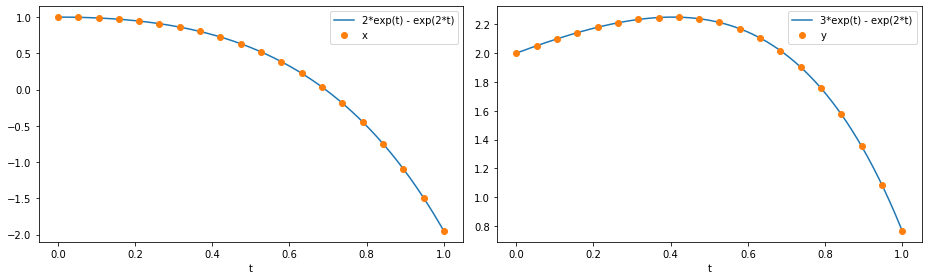

In [11]:
t_fine = np.linspace(0, t[-1], 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.plot(t_fine, 2 * np.exp(t_fine) - np.exp(2 * t_fine), t_sol, x(t_sol), "o")
ax1.set_xlabel("t")
ax1.legend(["2*exp(t) - exp(2*t)", "x"], loc="best")

ax2.plot(t_fine, 3 * np.exp(t_fine) - np.exp(2 * t_fine), t_sol, y(t_sol), "o")
ax2.set_xlabel("t")
ax2.legend(["3*exp(t) - exp(2*t)", "y"], loc="best")

plt.tight_layout()
plt.show()

In the [next notebook](./2-a-pde-model.ipynb) we show how to create, discretise and solve a PDE model in pybamm.